# 1 - Import Libraries

In [ ]:
# Import Libraries
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# 2 - Load Model

In [6]:
# Load Model
model = load_model('model_improve_tl_2.h5')

# 3 - Inferencing

In [7]:
class_names = ['FRESH', 'HALF', 'SPOILED']
print(class_names)

['FRESH', 'HALF', 'SPOILED']


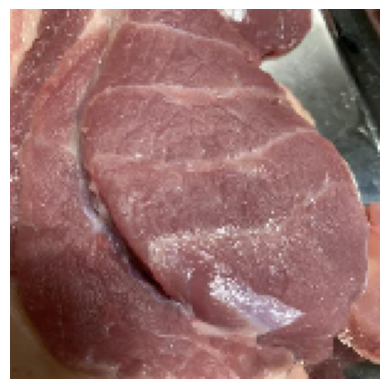

1/1 [==============================] - 0s 186ms/step
Result     :  [[9.9597126e-01 3.9929827e-03 3.5685964e-05]]
Max Class  :  0
Class Name :  FRESH



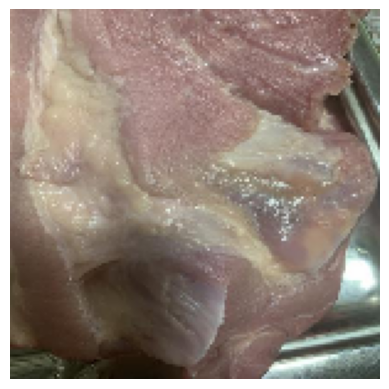

1/1 [==============================] - 0s 121ms/step
Result     :  [[0.15532774 0.8359642  0.00870808]]
Max Class  :  1
Class Name :  HALF



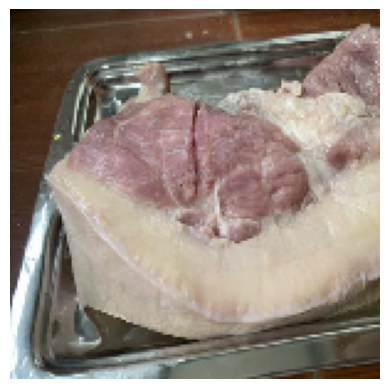

1/1 [==============================] - 0s 110ms/step
Result     :  [[5.4735283e-09 1.8354162e-07 9.9999976e-01]]
Max Class  :  2
Class Name :  SPOILED



In [9]:
# Test Images

img_paths = ['FRESH-1-_JPG.rf.65663691924ca0aede3884b863267c98.jpg',
             'HALF-FRESH-85-_JPG.rf.47062c0607dc05e07053fbdd5ac2486e.jpg',
             'SPOILED-648-_JPG.rf.99d39ea687f938633af1bf083117dd33.jpg']

target_size = (150, 150, 3)  # Or whatever dimensions you prefer

for filename in img_paths:
  img = image.load_img(filename, target_size=target_size)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  img_batch = img_batch / 150.0

  prediction_inf = model.predict(img_batch)
  result_max_proba = prediction_inf.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction_inf)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')